In [1]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report
from sklearn.ensemble import RandomForestClassifier

/Users/dishasaha/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Looking at the data

In [2]:
df_data=pd.read_csv("hotel_bookings.csv")#read the csv for dataset
df_data.head()#look at the first few rows for the train dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print("Rows in data:", df_data.shape[0])#Getting number of Rows
print("\nNumber of Columns in data:", df_data.shape[1])#Getting number of Columns
print ("\nFeatures : \n" ,df_data.columns.tolist())#Getting the column names

Rows in data: 119390

Number of Columns in data: 32

Features : 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [4]:
df_data.info() #looking at the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print("The number of NaN per column:", df_data.isnull().sum(), sep='\n')

The number of NaN per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                      

There are missing values in Country, agent, and company. However I am not concerned about these columns.

#### EDA

Text(0, 0.5, 'Count')

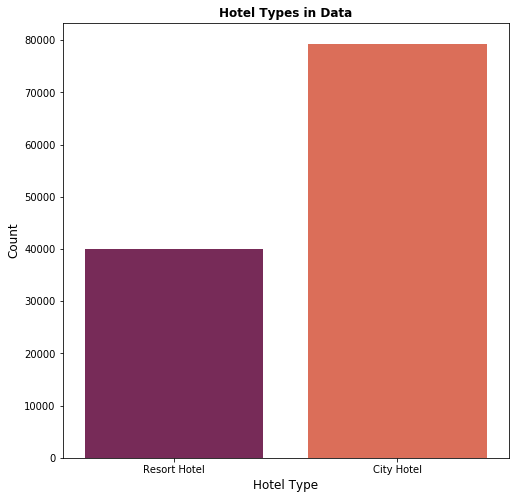

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x='hotel', data = df_data, palette='rocket')
plt.title('Hotel Types in Data', weight='bold')
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

After my preliminary review of the dataset, I have decided to focus my analysis on the rows that are just for the Resort Hotel. As a result, I will be dropping the City hotel data from my dataset. I have decided to do the analysis only on the data acquired from the Resort Hotel because I didn’t want my prediction to have a variability based on the hotel type.

In [7]:
resort_df=df_data.loc[df_data['hotel']=='Resort Hotel']#filtering the dataset to resort hotel
resort_df.shape #checking to see how many rows and columns

(40060, 32)

In [8]:
resort_df_typeinfo = resort_df["is_canceled"].value_counts()
print(resort_df_typeinfo)#looking at the overall values in cancellations, where 1 means cancelled

0    28938
1    11122
Name: is_canceled, dtype: int64


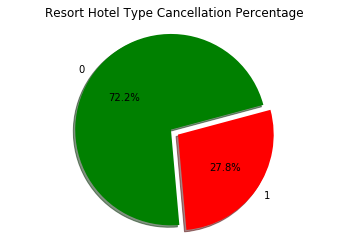

In [9]:
Cancel_Hotel = resort_df["is_canceled"].value_counts()#choosing the data in the cancel column to graph
my_labels = "0","1"
my_colors = ['green','red']
my_explode = (0, 0.09)
plt.pie(Cancel_Hotel,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Resort Hotel Type Cancellation Percentage')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

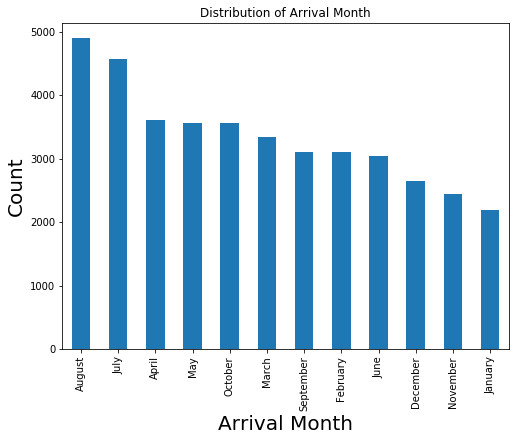

In [10]:
#Now going to graph out the distribution of Arrival Month
arrive = resort_df["arrival_date_month"].value_counts()
resort_df["arrival_date_month"].replace({'January' : '1', #replacing the month by its corresponding number
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)
resort_df["arrival_date_month"].sort_index(inplace=True)
arrive_plot = arrive.plot.bar(title='Distribution of Arrival Month', figsize=(8,6))
arrive_plot.set_xlabel('Arrival Month',size=20)
arrive_plot.set_ylabel('Count',size=20)

In [11]:
#creating a canceled dataframe
canceled_df=resort_df.loc[resort_df['is_canceled']==1]#filtering the dataset to canceled
canceled_df.shape #checking to see how many rows and columns

(11122, 32)

Text(0, 0.5, 'Count')

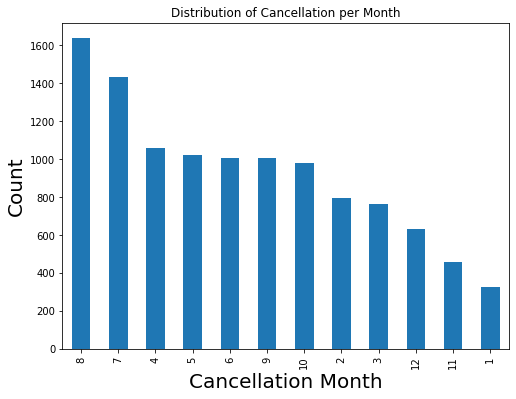

In [12]:
#Now going to graph out the distribution of which month had the highest cancelations
arrive_ca = canceled_df["arrival_date_month"].value_counts()
arrive_ca_plot = arrive_ca.plot.bar(title='Distribution of Cancellation per Month', figsize=(8,6))
arrive_ca_plot.set_xlabel('Cancellation Month',size=20)
arrive_ca_plot.set_ylabel('Count',size=20)

Looking at the two previous graphs, its evident that August and July are the busiest months for Arrival,and Cancelation 

I want to look for correlations next but I would want to dig into the columns that had missues values.

##### Preprocessing of Data

In [13]:
#looking at the perentage of missing values in my new Resort hotel dataframe
def missing_percent(x, y):
    percent = y.isnull().sum() / len(x) * 100
    return percent

#printing out the statements
print('Percentage of missing values:\nCountry: {}\nAgent: {}\nCompany: {}'.
      format(missing_percent(resort_df, resort_df['country']),missing_percent(resort_df, resort_df['agent']),
             missing_percent(resort_df, resort_df['company'])))

Percentage of missing values:
Country: 1.1582626060908638
Agent: 20.4917623564653
Company: 92.24163754368448


In [14]:
resort_df["country"].value_counts().count()#getting the count of differen countries present

125

In [15]:
resort_df["agent"].value_counts().count()#getting the count of differen agents present

185

In [16]:
resort_df["company"].value_counts().count()#getting the count of differen companies present

235

Looking at the pecentage of missing values for each column that had null values and looking at its distribution of the differet values it has, and based on my background research I don't believe that these will impact my prediction so I will drop these columns.

In [17]:
new_resort= resort_df.copy()#creating a new resort dataframe
new_resort.shape

(40060, 32)

In [18]:
# country, agent and company is dropped
new_resort = new_resort.drop(['country'], axis = 1)
new_resort = new_resort.drop(['agent'], axis = 1)
new_resort = new_resort.drop(['company'], axis = 1)
new_resort.shape

(40060, 29)

After dropping those three columns, we have 29 columns left.

In [19]:
corr_matrix1 = new_resort.corr()
corr_matrix1["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.229444
previous_cancellations            0.114173
adr                               0.109317
children                          0.081234
adults                            0.080546
stays_in_weekend_nights           0.078569
stays_in_week_nights              0.078477
arrival_date_year                 0.043624
arrival_date_week_number          0.021601
arrival_date_day_of_month        -0.009386
babies                           -0.023254
days_in_waiting_list             -0.036301
previous_bookings_not_canceled   -0.076767
total_of_special_requests        -0.101295
is_repeated_guest                -0.103563
booking_changes                  -0.114835
required_car_parking_spaces      -0.243863
Name: is_canceled, dtype: float64

In [20]:
# Fill in missing data for the 4 missing children. I am guessing these instances people didn't have children.
new_resort['children'] =  new_resort['children'].fillna(0)

In [21]:
new_resort.isnull().sum() #now doing a final check for any null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [22]:
new_resort.info() #looking at the datatypes again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40060 entries, 0 to 40059
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  float64
 11  babies                          40060 non-null  int64  
 12  meal                            

Need to convert categorical/object variables to numbers in order to process them

In [23]:
#going to use the label encoder method

labelencoder = LabelEncoder()
new_resort['hotel'] = labelencoder.fit_transform(new_resort['hotel'])
new_resort['arrival_date_month'] = labelencoder.fit_transform(new_resort['arrival_date_month'])
new_resort['meal'] = labelencoder.fit_transform(new_resort['meal'])
new_resort['market_segment']= labelencoder.fit_transform(new_resort['market_segment'])
new_resort['distribution_channel']=labelencoder.fit_transform(new_resort['distribution_channel'])
new_resort['is_repeated_guest'] = labelencoder.fit_transform(new_resort['is_repeated_guest'])
new_resort['reserved_room_type'] = labelencoder.fit_transform(new_resort['reserved_room_type'])
new_resort['assigned_room_type'] = labelencoder.fit_transform(new_resort['assigned_room_type'])
new_resort['deposit_type'] = labelencoder.fit_transform(new_resort['deposit_type'])
new_resort['customer_type'] = labelencoder.fit_transform(new_resort['customer_type'])
new_resort['reservation_status'] = labelencoder.fit_transform(new_resort['reservation_status'])

In [24]:
#New dataframe for the categorical coloumns
cat_resort= new_resort[['hotel','is_canceled','arrival_date_month','meal',
                                     'market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type',
                                     'customer_type','reservation_status']]

Text(0.5, 1, 'Correlation Matrix for Categorical Data Columns ')

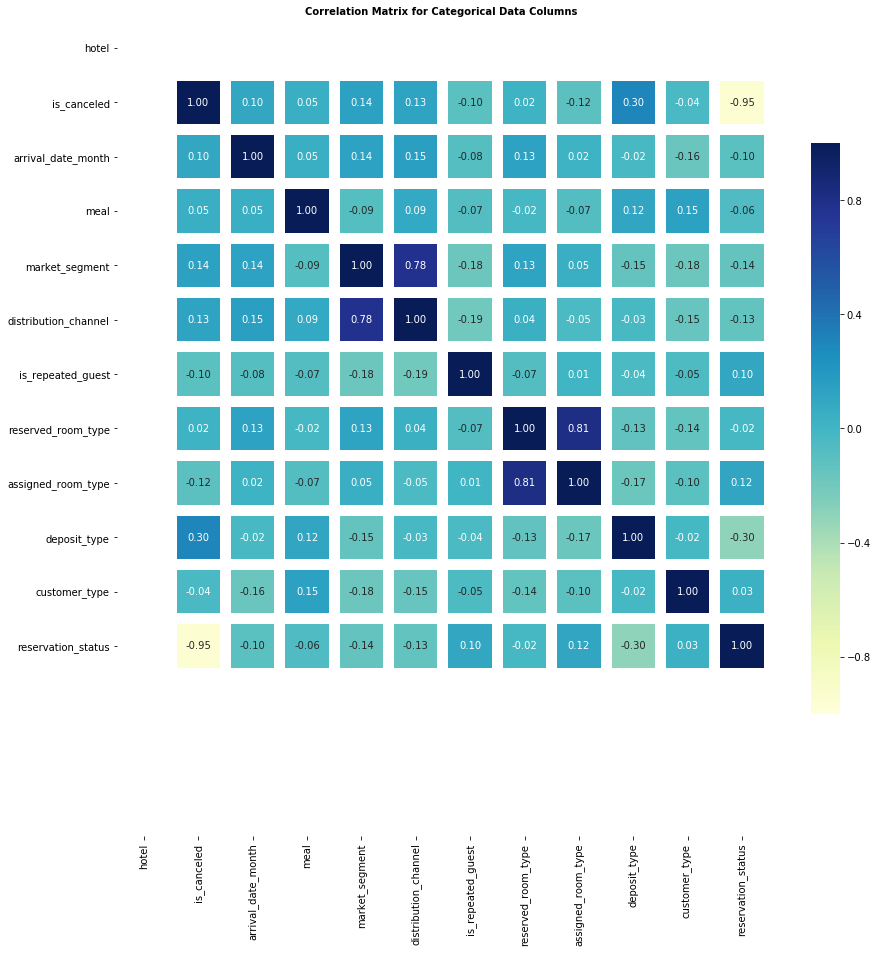

In [25]:
# Correlation Matrix with Spearman method for the Categorical data

plt.figure(figsize=(15,15))
corr_categorical=cat_resort.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='YlGnBu', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=10, cbar_kws={"shrink": .7}).set(ylim=(15, 0))
plt.title("Correlation Matrix for Categorical Data Columns ",size=10, weight='bold')

In [26]:
num_resort= new_resort.copy()#creating a data frame for numerical resort dataframe

#now dropping the categorical columns to be left with numberical columns
num_resort= num_resort.drop(['hotel','is_canceled','arrival_date_month','meal',
                                     'market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type',
                                     'customer_type','reservation_status'], axis=1)
num_resort.info()#as shown dataframe now has numerical features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40060 entries, 0 to 40059
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_week_number        40060 non-null  int64  
 3   arrival_date_day_of_month       40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   previous_cancellations          40060 non-null  int64  
 10  previous_bookings_not_canceled  40060 non-null  int64  
 11  booking_changes                 40060 non-null  int64  
 12  days_in_waiting_list            

Text(0.5, 1, 'Correlation Matrix for Numerical Data Columns')

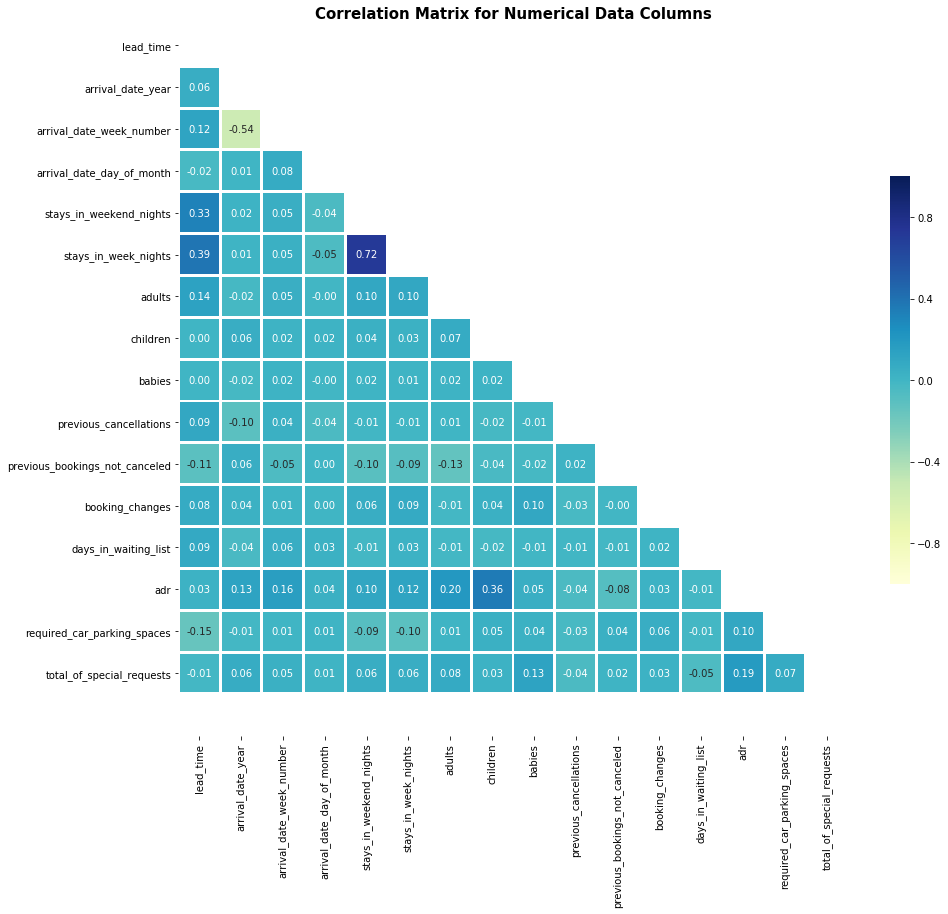

In [27]:
# Correlation Matrix with pearson method for numerical Columns 

plt.figure(figsize=(15,15))
corr_numerical=num_resort.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='YlGnBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix for Numerical Data Columns",size=15, weight='bold')

In [28]:
#splitting the data
X = (new_resort.loc[:, new_resort.columns != 'is_canceled'])
y = (new_resort.loc[:, new_resort.columns == 'is_canceled'])

In [29]:
x_columns = X.columns
#selecting object data types
object_column_name = X.select_dtypes('object').columns
print (object_column_name)

object_column_index = X.columns.get_indexer(X.select_dtypes('object').columns)
print (object_column_index)

Index(['reservation_status_date'], dtype='object')
[27]


In [30]:
print (x_columns) #printing all the columns used

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [31]:
print(X.shape)

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), object_column_index)], remainder='passthrough')

X = columnTransformer.fit_transform(X)
print(X.shape)

(40060, 28)
(40060, 940)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

In [33]:
#define model 
def model(al):
    al_model = al.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = al.predict_proba(X_test)[:,1]
    y_pred = al_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nClassification Report:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred),roc_auc_score(y_test,y_pred)))
    print(classification_report(y_test,y_pred))

In [34]:
print('Logistic Regression\n')#logistic regression model
model(LogisticRegression(solver = "saga"))

Logistic Regression

Accuracy Score: 0.7582792477949742

Confusion Matrix:
 [[8516  212]
 [2693  597]]

Classification Report:
 0.5785846620177802
              precision    recall  f1-score   support

           0       0.76      0.98      0.85      8728
           1       0.74      0.18      0.29      3290

    accuracy                           0.76     12018
   macro avg       0.75      0.58      0.57     12018
weighted avg       0.75      0.76      0.70     12018



In [35]:
print('Random Forest\n')#random forest model
model(RandomForestClassifier())

Random Forest

Accuracy Score: 0.9929272757530371

Confusion Matrix:
 [[8727    1]
 [  84 3206]]

Classification Report:
 0.9871767556604325
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8728
           1       1.00      0.97      0.99      3290

    accuracy                           0.99     12018
   macro avg       1.00      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



Per the model results Random Forest gave the highest accuracy score with an accuracy with 99%